## Animal Services Report
### Introduction
### Thesis
### Glossary

In [1]:
# Install matplotlib
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib
%matplotlib inline

Requirement already up-to-date: pip in /home/kellyrussell/miniconda3/lib/python3.7/site-packages (19.1.1)


In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sizing of charts
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi'] = 90

# Create sqlite database
conn = sqlite3.connect('animal_services.db')
# Read CSV into a variable
animalservices_data = pd.read_csv('louisville_animal_services_data.csv')
# Use as SQL
animalservices_data.to_sql('animalservices_data', conn, if_exists='replace')

## Animal Types
* What kinds of animals do animal services see?
* Segway into cat/dog focus

In [4]:
# How many different types of animals were brought in?
pd.read_sql_query("""
    SELECT DISTINCT AnimalType as 'Animal Types', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    GROUP BY AnimalType;
""", conn)

,Animal Types,Count
0,BIRD,1185
1,CAT,68741
2,DOG,77145
3,FERRET,91
4,LIVESTOCK,256
5,OTHER,1341
6,RABBIT,1139
7,REPTILE,263
8,RODENT,681


## The Black Cat Query
* We've always heard that black cats have the worst luck, but is it true?
* Maybe run another that shows the worst outcome...

In [5]:
# Black cat query... don't break mah heart:
pd.read_sql_query("""
    SELECT DISTINCT PrimaryColor as 'Cat Color', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    GROUP BY PrimaryColor
    ORDER BY Count DESC
    LIMIT 10;
""", conn)

,Cat Color,Count
0,BLACK,42259
1,WHITE,17379
2,BROWN,16764
3,GRAY,11566
4,TAN,7722
5,BROWN TABBY,7015
6,GRAY TABBY,4301
7,CALICO,3980
8,TRICOLOR,3892
9,ORANGE TABBY,3839


## Outcomes
* List the top ten distinct outcomes for cats and dogs
* Overwhelming amount of pets are euthanized.
* See if you can figure out what RTO, TNR are?

In [136]:
# More heart breaking...
pd.read_sql_query("""
    SELECT 
    DISTINCT OutcomeType as 'Outcome', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'CAT' OR AnimalType = 'DOG'
    GROUP BY OutcomeType
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)

,Outcome,Count
0,EUTH,68358
1,ADOPTION,25117
2,TRANSFER,17340
3,RTO,14248
4,FOSTER,4574
5,RELEASED,3460
6,TNR,3310
7,DIED,2455
8,DISPOSAL,1700
9,TRANSPORT,1660


## Status at Outcome
* Illustrate the status at outcome
* Most animals are healthy at outcome...

In [7]:
#OutcomeAsilomarStatus
pd.read_sql_query("""
    SELECT 
    DISTINCT OutcomeAsilomarStatus as 'Status at Outcome', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    GROUP BY OutcomeAsilomarStatus
    ORDER BY Count DESC
    ;
""", conn)

,Status at Outcome,Count
0,HEALTHY,147485
1,UNHEALTHY/UNTREATABLE,2765
2,TREATABLE/MANAGEABLE,390
3,None,202


## Breeds
* What breeds of cat and dog are most common?
* Mixed..

In [8]:
# Cat breeds
pd.read_sql_query("""
    SELECT 
    DISTINCT PrimaryBreed as 'Breed', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'CAT'
    GROUP BY PrimaryBreed
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)

,Breed,Count
0,DOMESTIC SHORTHAIR,55161
1,DOMESTIC MEDIUMHAIR,5986
2,DOMESTIC LONGHAIR,3295
3,AMERICAN SHORTHAIR,1607
4,SIAMESE,1281
5,MAINE COON,290
6,RUSSIAN BLUE,156
7,BENGAL,130
8,PERSIAN,129
9,SNOWSHOE,126


In [9]:
# Dog breeds
pd.read_sql_query("""
    SELECT 
    DISTINCT PrimaryBreed as 'Breed', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'DOG'
    GROUP BY PrimaryBreed
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)

,Breed,Count
0,PIT BULL TERRIER,14911
1,LABRADOR RETRIEVER,9615
2,GERMAN SHEPHERD DOG,5495
3,BEAGLE,5347
4,BOXER,2897
5,CHIHUAHUA - SMOOTH COATED,2621
6,AMERICAN PIT BULL TERRIER,2312
7,ROTTWEILER,2264
8,CHOW CHOW,2203
9,BORDER COLLIE,1635


## Intake reasons
The dataset includes information about noted intake reasons for animals brought in to Animal Services. It should be noted that the majority of records do not have an entry for this field: 77 percent of entries for both cats and dogs did not include a reason.

Sampling the entries that do include an intake reason, it is evident that the intake reasons for cats and dogs differ. Cats and dogs both overwhelmingly come in as strays, with cats coming in as strays slightly more frequently. When examining the top ten intake reasons, one can see that there are a variety of different reasons for each animal. For cats, the second most common reason for intake is that an owner surrendered or lost the animal due to having too many animals. For dogs, the second most common reason is "move," which illustrates that most owners surrender or lose their dogs due to the inability to make arrangements for their pet when moving to a new home. 

Both pets share the following reasons in the top ten: moving house, cost of ownership, landlord, no time for the pet, and having too many. Judging from the following pie charts, it appears more likely that cats would be surrended due to allergies than dogs, and dogs were more likely to be surrendered due to aggression and behavioral problems.

In [62]:
# Query the Top 10 IntakeReasons per Cat
# This does not include the many rows that are 'None'
catIntake = pd.read_sql_query("""
    SELECT 
    DISTINCT IntakeReason as 'Intake Reason', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'CAT' AND IntakeReason != 'None'
    GROUP BY IntakeReason
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)


In [128]:
# Query the Top 10 IntakeReasons per Dog
# This does not include the many rows that are 'None'
dogIntake = pd.read_sql_query("""
    SELECT 
    DISTINCT IntakeReason as 'Intake Reason', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'DOG' AND IntakeReason != 'None'
    GROUP BY IntakeReason
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)
df = pd.read_sql_query("""
    SELECT 
    IntakeReason
    FROM animalservices_data
    WHERE AnimalType = 'DOG' OR AnimalType = 'CAT'
    ;
""", conn).fillna('None')


In [129]:
# Total number of entires
totalEntries = df['IntakeReason'].count()
totalEntries

145886

In [130]:
# Total number of entries that do not have an intake reason
totalNoneEntries = df.loc[df['IntakeReason'] == 'None'].count()
totalNoneEntries

IntakeReason    112060
dtype: int64

In [131]:
# Get percentage
(totalNoneEntries / totalEntries) * 100

IntakeReason    76.813402
dtype: float64

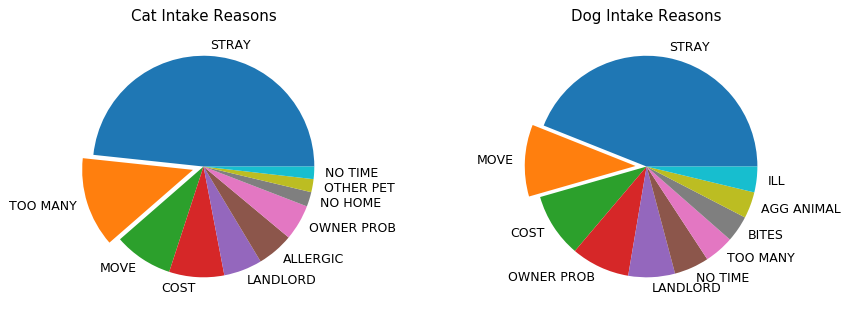

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 6))

# Pie chart for cat intake reasons
labels = catIntake["Intake Reason"]
catCount = catIntake["Count"]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
ax1.pie(catCount, labels=labels, explode=explode)
ax1.set_title("Cat Intake Reasons")

# Pie chart for dog intake reasons
labels = dogIntake["Intake Reason"]
dogCount = dogIntake["Count"]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
ax2.pie(dogCount, labels=labels, explode=explode)
ax2.set_title("Dog Intake Reasons")

plt.subplots_adjust(wspace=0.6, left=0.1)
plt.show()

### Conclusion